# Constant Temperature Model Fit:

Source: https://www.sciencedirect.com/science/article/abs/pii/S0092640X17300591?via%3Dihub

The constant temperature model is a phenomenological model that helps us calculate the nuclear level densities (NLD) for a given temperature parameter and excitation energy (E). The excitation energy is adjusted by another constant of energy shift $(E_0)$. Under the paradigm of this model, the NLDs are characterized by:

$\rho (E) = \frac{1}{T}*e^{(E-E_0)/T}$

It is stated in the paper that this model only works for excitation energies between 0 and 10 MeV.

The goals of this project are manifold:

1. To produce a best-fit model from the given NLD experimental data (see Source).

2. To compare the best fits generated from my notebook to the best fits given in the paper.

3. To compare the best fits (from my notebook and the paper) to the real data from the experiments (also given in the paper).

4. Calculate the temperature parameter from the TALYS manual and compare it to the parameters obtained by the fit in the notebook and the fit provided in the Karampagia et. al paper.

In [9]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import chisquare 
%matplotlib inline

In [10]:
def const_temp(E,T,E_0):
    ''' Function to calculate the NLD using the constant temperature model.
    INPUTS: Excitation Energy (E), the temperature parameter (T), the back-shifted energy (E_0)
    RETURNS: the NLD using the constant temperature model.'''
    
    return (1./T)*np.exp((E-E_0)/T)

In [11]:
# this fitting only works for excitation energies between 0-10.
E = np.arange(0.5,10.0,1.0)

## Fitting for Fluorine-19

Importing relevant data (from sheet and paper)

In [12]:
#extracting data for F-19
Flourine_19_data = pd.read_excel('NLD.xlsx',sheet_name='F-19')

NLD_F19 = Flourine_19_data['NLD']

In [13]:
# The temperature parameter and the E_0 value stated in Karampagia et. al (2017).

TempF19_sd_paper = 3.97 # in MeV
E0F19_sd_paper = -3.42 # in MeV

## Initial data plot

It is good practice to see what the data plot looks like before we go on to fit the data with our model.

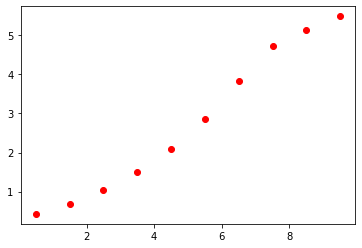

In [14]:
plt.scatter(E,NLD_F19,color = 'red',label = 'Shell model calculations')
plt.show()

## Fitting the curve:

NOTE: p0 is the initial guess for the parameters. Here I use the values reported in Karampagia et. al.

In [15]:
popt_F19, pcov_F19 = curve_fit(const_temp,E,NLD_F19,p0=[3.97,-3.42],bounds=[[0,-4],[4,0]]) #curve fitting
print(round(popt_F19[0],3),round(popt_F19[1],3)) # popt = optimal parameters; popt[0] = T and popt[1] = E_0



4.0 -3.54


## Plot

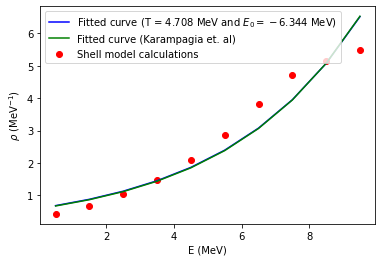

In [16]:
plt.scatter(E,NLD_F19,color = 'red',label = 'Shell model calculations')
plt.plot(E,const_temp(E,*popt_F19),'b',label = 'Fitted curve (T = 4.708 MeV and $E_0 = -6.344$ MeV)')
plt.plot(E,const_temp(E,TempF19_sd_paper,E0F19_sd_paper),'g',label= 'Fitted curve (Karampagia et. al)')
plt.xlabel('E (MeV)')
plt.ylabel(r'$\rho$ (MeV$^{-1}$)')
plt.legend(loc = 'best')
plt.show()

In [17]:
Rathi_fit_F19 = const_temp(E,*popt_F19)
Karampagia_fit_F19 = const_temp(E,TempF19_sd_paper,E0F19_sd_paper)

In [18]:
Rathi_fit_F19_dataframe = pd.DataFrame(Rathi_fit_F19)
Rathi_fit_F19_dataframe.describe()

,0
count,10.000000
mean,2.702241
std,1.944313
min,0.686345
25%,1.211942
50%,2.130630
75%,3.731230
max,6.511862


## Testing the goodness of the fits

The (reduced) chi-square analysis is a very good way to test the "goodness" of the fits to the experimental data. 
I will be testing the goodness of my fit (and consequently, the parameters) to the data and also to the fits presented in the paper.


In [19]:
def red_chi_square(data_obs, data_exp, dof=1):
    
    data_sum = 0
    
    for i in range(0,len(data_obs)):
        diff_square = (data_obs[i] - data_exp[i])**2/data_exp[i]
        data_sum += diff_square
        #print(round(data_obs[i],3),round(data_exp[i],3),data_sum)
    
    return data_sum/float(dof)
    

In [20]:
red_chi_square(Rathi_fit_F19, NLD_F19, 8)


0.0976416645386128

In [21]:
red_chi_square(Karampagia_fit_F19, NLD_F19, 8)

0.0974912791531055

## Fitting for Fluorine-20

In [22]:
#extracting data for F-20
Flourine_20_data = pd.read_excel('NLD.xlsx',sheet_name='F-20')

NLD_F20 = Flourine_20_data['NLD']

In [23]:
popt_F20, pcov_F20 = curve_fit(const_temp,E,NLD_F20,p0=[4.24,-7.29],bounds=[[1,-7.5],[5,-4]]) #curve fitting
print(round(popt_F20[0],3),round(popt_F20[1],3))

4.251 -7.5


In [24]:
TempF20_sd_paper = 4.24
E0F20_sd_paper = -7.29

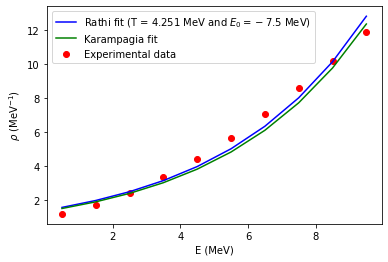

In [25]:
plt.scatter(E,NLD_F20,color = 'red',label='Experimental data')
plt.plot(E,const_temp(E,*popt_F20),'b',label= 'Rathi fit (T = 4.251 MeV and $E_0 = -7.5$ MeV)')
plt.plot(E,const_temp(E,TempF20_sd_paper,E0F20_sd_paper),'g',label= 'Karampagia fit')
plt.xlabel('E (MeV)')
plt.ylabel(r'$\rho$ (MeV$^{-1}$)')
plt.legend(loc = 'best')
plt.show()

## Testing the goodness of fits:

### Comparing the fits

In [26]:
Rathi_fit_F20 = const_temp(E,popt_F20[0],popt_F20[1])
Karampagia_fit_F20 = const_temp(E,TempF20_sd_paper,E0F20_sd_paper)


### Chi-squared test:

In [27]:
red_chi_square(Rathi_fit_F20, NLD_F20, 8)

0.061077983602833945

In [28]:
red_chi_square(Karampagia_fit_F20, NLD_F20, 8)

0.07523456567402809

## Fitting for Flourine-21

In [29]:
#extracting data for F-21
Flourine_21_data = pd.read_excel('NLD.xlsx',sheet_name='F-21')

NLD_F21 = Flourine_21_data['NLD']

In [30]:
popt_F21, pcov_F21 = curve_fit(const_temp,E,NLD_F20,p0=[3.91,-6.37],bounds=[[0,-7],[4,-3]]) #curve fitting
print(popt_F21)

[ 4.         -6.35239126]


In [31]:
TempF21_sd_paper = 3.91
E0F21_sd_paper = -6.37

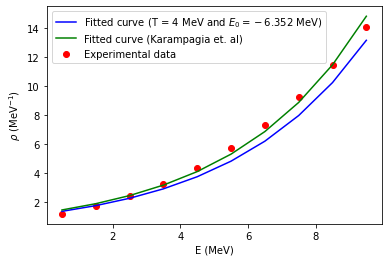

In [32]:
plt.scatter(E,NLD_F21,color = 'red',label = 'Experimental data')
plt.plot(E,const_temp(E,*popt_F21),'b',label = 'Fitted curve (T = 4 MeV and $E_0 = -6.352$ MeV)')
plt.plot(E,const_temp(E,TempF21_sd_paper,E0F21_sd_paper),'g',label= 'Fitted curve (Karampagia et. al)')
plt.xlabel('E (MeV)')
plt.ylabel(r'$\rho$ (MeV$^{-1}$)')
plt.legend(loc = 'best')
plt.show()

## Testing the goodness of fits:

### Comparing the fits:

In [33]:
Rathi_fit_F21 = const_temp(E,popt_F21[0],popt_F21[1])
Karampagia_fit_F21 = const_temp(E,TempF21_sd_paper,E0F21_sd_paper)


### Comparing to the experimental data:

In [34]:
red_chi_square(Rathi_fit_F21, NLD_F21, 8)

0.1060902407940673

In [35]:
red_chi_square(Karampagia_fit_F21, NLD_F21, 8)

0.027180199961704336

## Fitting for Magnesium-24

In [36]:
#extracting data for Mg-24
Magnesium_24_data = pd.read_excel('NLD.xlsx',sheet_name='Mg-24')

NLD_Mg24 = Magnesium_24_data['NLD']

In [37]:
popt_Mg24, pcov_Mg24 = curve_fit(const_temp,E,NLD_Mg24, p0=[2.64,1.49],bounds=[[0,1.25],[3,4]]) #curve fitting
print(popt_Mg24)

[2.70650154 1.25      ]


In [38]:
pcov_Mg24

array([[ 0.0040563 , -0.01505977],
       [-0.01505977,  0.05684719]])

In [39]:
TempMg24_sd_paper = 2.64
E0Mg24_sd_paper = 1.49

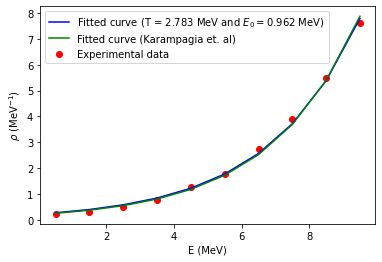

In [40]:
plt.scatter(E,NLD_Mg24,color = 'red',label='Experimental data')
plt.plot(E,const_temp(E,*popt_Mg24),'b',label = 'Fitted curve (T = 2.783 MeV and $E_0 = 0.962$ MeV)')
plt.plot(E,const_temp(E,TempMg24_sd_paper,E0Mg24_sd_paper),'g',label= 'Fitted curve (Karampagia et. al)')
plt.xlabel('E (MeV)')
plt.ylabel(r'$\rho$ (MeV$^{-1}$)')
plt.legend(loc = 'best')
plt.show()

## Testing the goodness of fits:

In [41]:
Rathi_fit_Mg24 = const_temp(E,popt_Mg24[0],popt_Mg24[1])
Karampagia_fit_Mg24 = const_temp(E,TempMg24_sd_paper,E0Mg24_sd_paper)


In [42]:
red_chi_square(Rathi_fit_Mg24, NLD_Mg24, 8)

0.009380023891811064

In [43]:
red_chi_square(Karampagia_fit_Mg24, NLD_Mg24, 8)

0.007893036057052724

## The pcov matrix from 'curve_fit' function:

pcov is an nxn matrix (in this case, 2x2 since we are fitting two parameters). The diagonal elements give the variance of the fitted parameters while the off-diagonal ones give the covariance between the two parameters (T and E_0 in this case)

In [44]:
pcov_F19, pcov_F20, pcov_F21, pcov_Mg24

(array([[ 0.23819729, -0.92694608],
        [-0.92694608,  3.65537242]]),
 array([[ 0.07072342, -0.32736723],
        [-0.32736723,  1.52908008]]),
 array([[ 0.09112808, -0.41870471],
        [-0.41870471,  1.9422391 ]]),
 array([[ 0.0040563 , -0.01505977],
        [-0.01505977,  0.05684719]]))

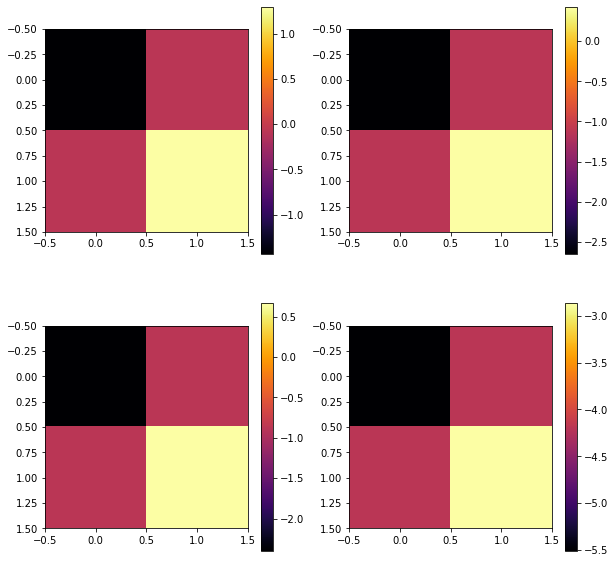

In [45]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,10))


e1 = ax1.imshow(np.log(np.abs(pcov_F19)),cmap = 'inferno')
e2 = ax2.imshow(np.log(np.abs(pcov_F20)),cmap = 'inferno')
e3 = ax3.imshow(np.log(np.abs(pcov_F21)),cmap = 'inferno')
e4 = ax4.imshow(np.log(np.abs(pcov_Mg24)),cmap = 'inferno')

fig.colorbar(e1,ax=ax1)
fig.colorbar(e2, ax=ax2)
fig.colorbar(e3, ax=ax3)
fig.colorbar(e4, ax=ax4)
plt.show()

# Calculations from TALYS

Source: https://www-nds.iaea.org/talys/tutorials/talys_v1.96.pdf

The TALYS manual has discussed different nuclear models and the constant temperature model (Section 8.1.4, pg. 124) is one among them. Based on observations and fitting, the TALYS manual provides formulae for the temperature parameter.

It briefly mentions two under the CTM model: the effective model and the collective model. It finally provides the formulae for T.

For the effective model under CTM:

$ T = -0.22 + \frac{9.4}{\sqrt{A(1+\gamma \delta W)}} $

For the collective model under CTM:

$ T = -0.25 + \frac{10.2}{\sqrt{A(1+\gamma \delta W)}} $

where, $\gamma = \frac{\gamma_1}{A^{1/3}} $

Here, the values of $\gamma_1$ are taken from Table 8.1 in the manual (pg. 120) and $\delta W$ is the difference in mass of of the nucleus measured experimentally and the mass of the nucleus according to the liquid drop model (LDM).

$ \delta W = M_{exp} - M_{LDM} $

The data for $M_{exp}$ has been taken from AME2020 experimental mass compilation (http://cms.iopscience.org/085e4ab8-0d63-11e7-9a47-19ee90157113/030003_Table1.pdf?guest=true) and the $ M_{LDM}$ has been taken from Myers and Swiatecki (1966).

$ M_{LDM} = M_n N + M_H Z + E_{vol} + E_{sur} + E_{Coul} + \delta $

Here, $ \delta = -\frac{11}{\sqrt{A}} $ (even-even); $\delta = 0 $ (odd); $\delta = \frac{11}{\sqrt{A}} (odd-odd). $

NOTE: Refer to the TALYS manual (pg. 120)

## Calculation of backshift energy parameter from TALYS:

In the TALYS manual, the backshift energy parameter is given by:

$ \Delta_{CTM} = \chi*\frac{12}{\sqrt{N+Z}} $

with $ \chi = 2 $ for even-even

$ \chi = 1 $ for odd-even

$ \chi = 0 $ for odd-odd

The obtained values of temperature and backshift energy can be used as initial guesses to the parameters while fitting the functions.

In [46]:
def mass_liquid_drop_model(N,Z):
    
    '''Function to calculate the mass excess of an element under the liquid drop model.
    This has been borrowed from the paper by Myers and Swiatecki (1966).
    INPUTS: The number of neutrons (N) and protons (Z)
    RETURNS: the mass excess of the element under assuming a liquid drop model.'''
    
    # Defining constants
    M_n = 8.07144 # in MeV
    M_H = 7.28899 # in MeV
    
    a1 = 15.677
    a2 = 18.56
    
    kappa = 1.79
    
    c1 = a1*(1-kappa*(N-Z)**2/(N+Z)**2)
    c2 = a2*(1-kappa*(N-Z)**2/(N+Z)**2)
    c3 = 0.717
    c4 = 1.21129
    
    # Deciding the value of delta (in LDM) depending on the pairing.
    if Z%2 == 0 and N%2 == 0:
        delta = -11/(Z+N)**0.5
        #print('Z and N are even')
        
    elif (Z%2 !=0 and N%2 == 0) or (Z%2 == 0 and N%2 !=0):
        delta = 0
        #print('Either Z or N is odd')
    
    else:
        delta = 11/(Z+N)**0.5
        #print('Both are odd')
    
    # calculation of volume, Coulomb and surface energies.
    E_vol = -c1*(Z+N)
    E_Coul = c3*Z**2/(Z+N)**(1./3.) - c4*Z**2/(Z+N)
    E_sur = c2*(Z+N)**(2./3.)
    
    return M_n*N + M_H*Z + E_vol + E_sur + E_Coul + delta # the mass excess under LDM.


In [47]:
def temp_TALYS(N,Z,mass_exp):
    
    '''Function that calculates the temperature parameter for effective and collective dofs.
    (Theory behind this can be found in the TALYS manual).
    
    INPUTS: # of neutrons (N) and # of protons (Z)
    RETURN: the temperature parameters for effective and collective dofs'''
    
    mass_LDM = mass_liquid_drop_model(N,Z)
    delta_W = mass_exp - mass_LDM
    
    gamma_eff = 0.433090/(N+Z)**(1./3.)
    gamma_coll = 0.473625/(N+Z)**(1./3.)
    
    T_eff = -0.22 + 9.4/((N+Z)*(1+gamma_eff*delta_W))**0.5
    T_coll = -0.25 + 10.2/((N+Z)*(1+gamma_coll*delta_W))**0.5
    
    return T_eff,T_coll

In [52]:
def backshift_energy(N,Z):
    
    if Z%2 == 0 and N%2 == 0:
        chi = 2.0
        #print('Z and N are even')
        
    elif (Z%2 !=0 and N%2 == 0) or (Z%2 == 0 and N%2 !=0):
        chi = 1.0
        #print('Either Z or N is odd')
    
    else:
        chi = 0.0
        #print('Both are odd')
    
    return chi*12.0/np.sqrt(N+Z)

### Flourine-19

In [48]:
T_talys_F19 = temp_TALYS(10,9,-1.487)
print("The effective T value from TALYS is {} MeV".format(round(T_talys_F19[0],3)))
print("The collective DOF T value from TALYS is {} MeV".format(round(T_talys_F19[1],3)))
print("The T value from my fit is {} MeV".format(round(popt_F19[0],3)))
print("The T value from Karampagia et. al, is {} MeV".format(TempF19_sd_paper))

The effective T value from TALYS is 1.856 MeV
The collective DOF T value from TALYS is 1.996 MeV
The T value from my fit is 4.0 MeV
The T value from Karampagia et. al, is 3.97 MeV


### Flourine-20

In [49]:
T_talys_F20 = temp_TALYS(11,9,-17.463*10**(-3))
print("The effective DOF T value from TALYS is {} MeV".format(round(T_talys_F20[0],3)))
print("The collective DOF T value from TALYS is {} MeV".format(round(T_talys_F20[1],3)))
print("The T value from my fit is {} MeV".format(round(popt_F20[0],3)))
print("The T value from Karampagia et. al, is {} MeV".format(TempF20_sd_paper))

The effective DOF T value from TALYS is 1.838 MeV
The collective DOF T value from TALYS is 1.979 MeV
The T value from my fit is 4.251 MeV
The T value from Karampagia et. al, is 4.24 MeV


### Flourine-21

In [50]:
T_talys_F21 = temp_TALYS(12,9,-47.6*10**(-3))
print("The effective DOF T value from TALYS is {} MeV".format(round(T_talys_F21[0],3)))
print("The collective DOF T value from TALYS is {} MeV".format(round(T_talys_F21[1],3)))
print("The T value from my fit is {} MeV".format(round(popt_F21[0],3)))
print("The T value from Karampagia et. al, is {} MeV".format(TempF21_sd_paper))

The effective DOF T value from TALYS is 1.549 MeV
The collective DOF T value from TALYS is 1.647 MeV
The T value from my fit is 4.0 MeV
The T value from Karampagia et. al, is 3.91 MeV


### Magnesium-24

In [51]:
T_talys_Mg24 = temp_TALYS(12,12,-13933.578*10**(-3))
print("The effective DOF T value from TALYS is {} MeV".format(round(T_talys_Mg24[0],3)))
print("The collective DOF T value from TALYS is {} MeV".format(round(T_talys_Mg24[1],3)))
print("The T value from my fit is {} MeV".format(round(popt_Mg24[0],3)))
print("The T value from Karampagia et. al, is {} MeV".format(TempMg24_sd_paper))

The effective DOF T value from TALYS is 2.274 MeV
The collective DOF T value from TALYS is 2.548 MeV
The T value from my fit is 2.707 MeV
The T value from Karampagia et. al, is 2.64 MeV


In [55]:
E0_F19 = backshift_energy(10,9)

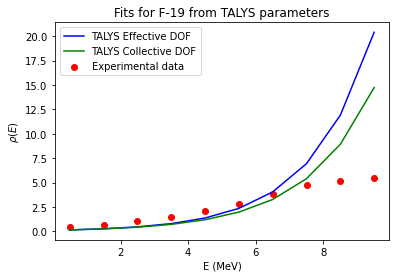

In [58]:
plt.scatter(E,NLD_F19,color = 'red',label='Experimental data')
plt.plot(E, const_temp(E,T_talys_F19[0],E0_F19),'b',label = 'TALYS Effective DOF')
plt.plot(E, const_temp(E,T_talys_F19[1],E0_F19),'g', label = 'TALYS Collective DOF')

plt.legend(loc='best')
plt.title('Fits for F-19 from TALYS parameters')

plt.xlabel('E (MeV)')
plt.ylabel(r'$\rho(E)$')

plt.show()